In [ ]:
# prompt: extract a zip file /content/dataset_blood_group_bnew.zip

!unzip /content/dataset_blood_group_bnew.zip

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batchsize=5
train_dir="dataset_blood_group_bnew"
train_datagen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)
train_data_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(206,192),
    color_mode='grayscale',

    batch_size=batchsize,
    class_mode="categorical",
    subset="training"
)
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(206,192),
    color_mode='grayscale',
    batch_size=batchsize,
    class_mode='categorical',
    subset='validation'
)

Found 4803 images belonging to 8 classes.
Found 1197 images belonging to 8 classes.


In [ ]:
for batch in train_data_generator:
    for img in batch:
        print(img[1].shape)
        break
    break

(206, 192, 1)


In [ ]:
import tensorflow as tf

def acc_model():



    model = tf.keras.models.Sequential([
        tf.keras.Input(shape=(206, 192, 1)),

        # Conv Block 1
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.MaxPooling2D(2, 2),

        # Conv Block 2
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.MaxPooling2D(2, 2),

        # Conv Block 3 (deeper for better feature extraction)
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.MaxPooling2D(2, 2),

        # Fully Connected Layers
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),  # Helps generalization
        tf.keras.layers.Dense(train_data_generator.num_classes, activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002),  # Lower LR for stability
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model



In [ ]:
low_acc_model = acc_model()
history_low_acc = low_acc_model.fit(
    train_data_generator,
    validation_data=validation_generator,
    epochs=5,
    steps_per_epoch=train_data_generator.samples ,
    validation_steps=validation_generator.samples
)

Epoch 1/5
 961/4803 ━━━━━━━━━━━━━━━━━━━━ 42s 11ms/step - accuracy: 0.4565 - loss: 1.4271

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


4803/4803 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.5958 - loss: 1.0715 - val_accuracy: 0.7644 - val_loss: 0.5628
Epoch 2/5
4803/4803 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7983 - loss: 0.5167 - val_accuracy: 0.8622 - val_loss: 0.3810
Epoch 3/5
4803/4803 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8542 - loss: 0.3813 - val_accuracy: 0.8463 - val_loss: 0.3946
Epoch 4/5
4803/4803 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8859 - loss: 0.3084 - val_accuracy: 0.8797 - val_loss: 0.3286
Epoch 5/5
4803/4803 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9173 - loss: 0.2120 - val_accuracy: 0.8822 - val_loss: 0.3262


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

In [ ]:
acc_model = acc_model()
history_low_acc = acc_model.fit(
    train_data_generator,
    validation_data=validation_generator,
    epochs=50,
    callbacks=[early_stopping, lr_scheduler]

)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


961/961 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.4081 - loss: 1.6604 - val_accuracy: 0.8246 - val_loss: 0.6344 - learning_rate: 2.0000e-04
Epoch 2/50
961/961 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.7174 - loss: 0.8596 - val_accuracy: 0.8563 - val_loss: 0.4886 - learning_rate: 2.0000e-04
Epoch 3/50
961/961 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.7949 - loss: 0.6514 - val_accuracy: 0.8672 - val_loss: 0.4421 - learning_rate: 2.0000e-04
Epoch 4/50
961/961 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8067 - loss: 0.5970 - val_accuracy: 0.8605 - val_loss: 0.4139 - learning_rate: 2.0000e-04
Epoch 5/50
961/961 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.8335 - loss: 0.5236 - val_accuracy: 0.8822 - val_loss: 0.3877 - learning_rate: 2.0000e-04
Epoch 6/50
961/961 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8609 - loss: 0.4510 - val_accuracy: 0.8772 - val_loss: 0.3798 - learning_rate: 2.0000e-04
Epoch 7/50
961/961 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accurac

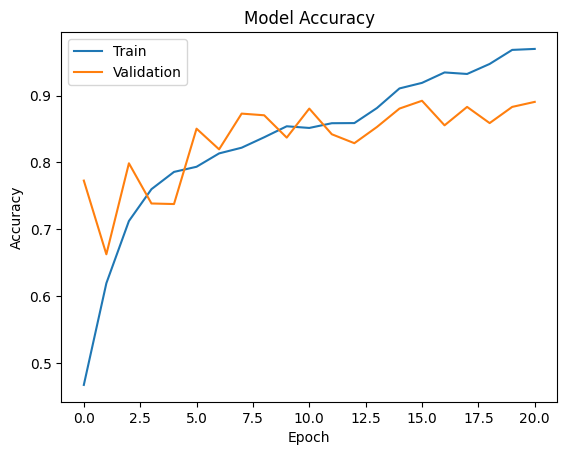

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
def plot_accuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Call the function to display the accuracy graph
plot_accuracy(history_low_acc)

In [ ]:
acc_model.save("model95.h5")

In [ ]:
low_acc_eval = low_acc_model.evaluate(validation_generator)
print(f"Low Accuracy Model - Loss: {low_acc_eval[0]}, Accuracy: {low_acc_eval[1]}")

240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8856 - loss: 0.3115
Low Accuracy Model - Loss: 0.32616543769836426, Accuracy: 0.8822054862976074


In [ ]:
image_path = input("enter path of the Image:")
from tensorflow.keras.preprocessing import image
import numpy as np
# Define the target image size (must match the target_size during training)
IMG_HEIGHT = 206  # Replace with your actual height
IMG_WIDTH = 192 # Replace with your actual width

# Preprocess the image
img = image.load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH), color_mode='grayscale')  # Resize image

print(img.size)
img_array = image.img_to_array(img)  # Convert to array
print(img_array.shape)
img_array = img_array / 255.0  # Rescale (1./255 as in training)
img_array = np.expand_dims(img_array, axis=0)
predictions=low_acc_model.predict(img_array)

class_indices = train_data_generator.class_indices
classes = list(class_indices.keys())
predicted_class = classes[np.argmax(predictions)]
print(f"Predicted class: {predicted_class}")
print(f"Prediction probabilities: {predictions}")

enter path of the Image:/content/nagi.jpg
(192, 206)
(206, 192, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted class: AB-
Prediction probabilities: [[1.09943125e-04 4.29501466e-04 1.22820666e-07 8.32065821e-01
  2.41200055e-08 1.39336000e-04 1.37953510e-04 1.67117223e-01]]


In [ ]:
# prompt: load the model95 and predict with it

import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

model = tf.keras.models.load_model('model95.h5')

image_path = input("Enter path of the image: ")
IMG_HEIGHT = 206
IMG_WIDTH = 192

img = image.load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)

# Assuming you have the class indices from the training data generator
# Replace this with your actual class_indices if different
class_indices = {'A_Positive': 0, 'A_Negative': 1, 'B_Positive': 2, 'B_Negative': 3, 'AB_Positive': 4, 'AB_Negative': 5, 'O_Positive': 6, 'O_Negative': 7} #Example
classes = list(class_indices.keys())
predicted_class = classes[np.argmax(predictions)]
print(f"Predicted class: {predicted_class}")
print(f"Prediction probabilities: {predictions}")


Enter path of the image: /content/real.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
Predicted class: B_Negative
Prediction probabilities: [[1.2483964e-04 2.8746828e-01 4.6158082e-05 6.9148248e-01 2.0572235e-04
  1.2332352e-03 1.9644774e-03 1.7474793e-02]]


# model2


In [ ]:
import tensorflow as tf

def improved_acc_model():
    inputs = tf.keras.Input(shape=(206, 192, 1))

    # Conv Block 1
    x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = tf.keras.layers.MaxPooling2D(2, 2)(x)

    # Conv Block 2
    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = tf.keras.layers.MaxPooling2D(2, 2)(x)

    # Conv Block 3
    x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = tf.keras.layers.MaxPooling2D(2, 2)(x)

    # Conv Block 4 (Deeper Network)
    x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = tf.keras.layers.MaxPooling2D(2, 2)(x)

    # Residual Block (Adding residual connections for better learning)
    res = tf.keras.layers.Conv2D(256, (1, 1), padding='same')(x)
    x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Add()([x, res])  # Adding residual connection
    x = tf.keras.layers.MaxPooling2D(2, 2)(x)

    # Global Average Pooling instead of Flatten
    x = tf.keras.layers.GlobalAveragePooling2D()(x)

    # Fully Connected Layers
    x = tf.keras.layers.Dense(256, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.3)(x)

    outputs = tf.keras.layers.Dense(train_data_generator.num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs, outputs)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Lower LR for complex models
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
model2 = improved_acc_model()
history_low_acc = model2.fit(
    train_data_generator,
    validation_data=validation_generator,
    epochs=50,
    callbacks=[early_stopping, lr_scheduler]

)

Epoch 1/50
961/961 ━━━━━━━━━━━━━━━━━━━━ 54s 40ms/step - accuracy: 0.3766 - loss: 2.4901 - val_accuracy: 0.7728 - val_loss: 1.4302 - learning_rate: 1.0000e-04
Epoch 2/50
961/961 ━━━━━━━━━━━━━━━━━━━━ 28s 29ms/step - accuracy: 0.5924 - loss: 1.8635 - val_accuracy: 0.6625 - val_loss: 1.5903 - learning_rate: 1.0000e-04
Epoch 3/50
961/961 ━━━━━━━━━━━━━━━━━━━━ 27s 28ms/step - accuracy: 0.6884 - loss: 1.5475 - val_accuracy: 0.7987 - val_loss: 1.1955 - learning_rate: 1.0000e-04
Epoch 4/50
961/961 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.7527 - loss: 1.3548 - val_accuracy: 0.7385 - val_loss: 1.3514 - learning_rate: 1.0000e-04
Epoch 5/50
961/961 ━━━━━━━━━━━━━━━━━━━━ 27s 28ms/step - accuracy: 0.7743 - loss: 1.2641 - val_accuracy: 0.7377 - val_loss: 1.3776 - learning_rate: 1.0000e-04
Epoch 6/50
961/961 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.7969 - loss: 1.1562 - val_accuracy: 0.8505 - val_loss: 0.9593 - learning_rate: 1.0000e-04
Epoch 7/50
961/961 ━━━━━━━━━━━━━━━━━━━━ 28s 29ms/ste

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
def preprocess_image(image):
    """ Resizes image while maintaining aspect ratio and adding padding. """
    target_size = (206, 192)  # Model input size
    h, w = image.shape[:2]

    # Compute aspect ratio
    aspect = w / h

    # Compute new dimensions maintaining aspect ratio
    if aspect > (target_size[1] / target_size[0]):
        new_w = target_size[1]
        new_h = int(new_w / aspect)
    else:
        new_h = target_size[0]
        new_w = int(new_h * aspect)

    # Resize with aspect ratio preserved
    resized = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_AREA)

    # Create a blank image with target size and place resized image in center
    padded = np.ones((target_size[0], target_size[1]), dtype=np.uint8) * 255  # White padding
    start_x = (target_size[1] - new_w) // 2
    start_y = (target_size[0] - new_h) // 2
    padded[start_y:start_y+new_h, start_x:start_x+new_w] = resized

    return cv2.cvtColor(padded, cv2.COLOR_GRAY2RGB)
image_path = input("Enter path of the image: ")
img = cv2.imread(image_path)

predictions=model2.predict(preprocess_image(img))
class_indices = train_data_generator.class_indices
classes = list(class_indices.keys())
predicted_class = classes[np.argmax(predictions)]
print(f"Predicted class: {predicted_class}")
print(f"Prediction probabilities: {predictions}")

In [ ]:
!unzip /content/dataset_blood_group.zip

In [ ]:
import tensorflow as tf
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

In [ ]:
batchsize = 5
train_dir = "dataset_blood_group"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data_generator2 = train_datagen.flow_from_directory(
    train_dir,
    target_size=(206, 192),

    batch_size=batchsize,
    class_mode="categorical",
    subset="training"
)

validation_generator2 = train_datagen.flow_from_directory(
    train_dir,
    target_size=(206, 192),

    batch_size=batchsize,
    class_mode='categorical',
    subset='validation'
)

Found 4803 images belonging to 8 classes.
Found 1197 images belonging to 8 classes.


In [ ]:
def fingerprint_resnet():
    # Load ResNet50 with modified input shape (3 channels)
    base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(206, 192, 3))

    # Freeze early layers (first 100 layers)
    for layer in base_model.layers[:100]:
        layer.trainable = False

    # Add custom layers on top
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)

    # Output layer for multi-class classification
    outputs = Dense(train_data_generator2.num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=outputs)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Create model
resnet_model = fingerprint_resnet()

# Train the model
history_resnet = resnet_model.fit(
    train_data_generator2,
    validation_data=validation_generator2,
    epochs=10,
    steps_per_epoch=train_data_generator2.samples // batchsize,
    validation_steps=validation_generator2.samples // batchsize
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


960/960 ━━━━━━━━━━━━━━━━━━━━ 102s 72ms/step - accuracy: 0.3318 - loss: 1.7815 - val_accuracy: 0.6845 - val_loss: 0.8687
Epoch 2/10
  1/960 ━━━━━━━━━━━━━━━━━━━━ 51s 53ms/step - accuracy: 0.8000 - loss: 0.5815

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


960/960 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8000 - loss: 0.5815 - val_accuracy: 0.6921 - val_loss: 0.8488
Epoch 3/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 142s 95ms/step - accuracy: 0.5823 - loss: 1.2447 - val_accuracy: 0.7205 - val_loss: 0.7770
Epoch 4/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6000 - loss: 1.5556 - val_accuracy: 0.7172 - val_loss: 0.7848
Epoch 5/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 53s 56ms/step - accuracy: 0.6987 - loss: 0.8957 - val_accuracy: 0.7824 - val_loss: 0.5539
Epoch 6/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6000 - loss: 0.7499 - val_accuracy: 0.7858 - val_loss: 0.5550
Epoch 7/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 82s 61ms/step - accuracy: 0.7138 - loss: 0.8289 - val_accuracy: 0.8075 - val_loss: 0.5282
Epoch 8/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 1.0000 - loss: 0.1957 - val_accuracy: 0.8100 - val_loss: 0.5351
Epoch 9/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 82s 85ms/step - accuracy: 0.7700 - loss: 0.6805 - val_accuracy: 0.80

In [ ]:
def fingerprint_resnet():
    from tensorflow.keras.applications import MobileNetV2
    base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(206, 192, 3))


    # Freeze early layers (first 100 layers)
    for layer in base_model.layers[:100]:
        layer.trainable = False

    # Add custom layers on top
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)

    # Output layer for multi-class classification
    outputs = Dense(train_data_generator2.num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=outputs)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Create model
resnet_model = fingerprint_resnet()

# Train the model
history_resnet = resnet_model.fit(
    train_data_generator2,
    validation_data=validation_generator2,
    epochs=10,
    steps_per_epoch=train_data_generator2.samples // batchsize,
    validation_steps=validation_generator2.samples // batchsize
)

<ipython-input-25-a4af32b96d14>:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(206, 192, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 49s 29ms/step - accuracy: 0.3878 - loss: 1.6448 - val_accuracy: 0.7674 - val_loss: 0.6878
Epoch 2/10
  1/960 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.6000 - loss: 1.4824

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


960/960 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6000 - loss: 1.4824 - val_accuracy: 0.7657 - val_loss: 0.6866
Epoch 3/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - accuracy: 0.7076 - loss: 0.8478 - val_accuracy: 0.8385 - val_loss: 0.4542
Epoch 4/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8000 - loss: 0.4648 - val_accuracy: 0.8393 - val_loss: 0.4555
Epoch 5/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.7941 - loss: 0.5979 - val_accuracy: 0.8025 - val_loss: 0.5481
Epoch 6/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6000 - loss: 1.0787 - val_accuracy: 0.8025 - val_loss: 0.5474
Epoch 7/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.8463 - loss: 0.4663 - val_accuracy: 0.8293 - val_loss: 0.5200
Epoch 8/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8000 - loss: 0.6560 - val_accuracy: 0.8268 - val_loss: 0.5282
Epoch 9/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.8866 - loss: 0.3665 - val_accuracy: 0.827

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
resnet_model = fingerprint_resnet()

# Train the model
history_resnet = resnet_model.fit(
    train_data_generator2,
    validation_data=validation_generator2,
    epochs=10,
    callbacks=[early_stopping, lr_scheduler]

)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB3

# 1️⃣ Define Custom Layers for Attention Mechanisms
class SpatialAttention(layers.Layer):
    def __init__(self, **kwargs):
        super(SpatialAttention, self).__init__(**kwargs)
        self.conv = layers.Conv2D(1, kernel_size=7, activation='sigmoid', padding='same')

    def call(self, inputs):
        avg_pool = tf.reduce_mean(inputs, axis=-1, keepdims=True)
        max_pool = tf.reduce_max(inputs, axis=-1, keepdims=True)
        concat = tf.concat([avg_pool, max_pool], axis=-1)
        attention = self.conv(concat)
        return inputs * attention
class ChannelAttention(layers.Layer):
    def __init__(self, channels, **kwargs):
        super(ChannelAttention, self).__init__(**kwargs)
        self.channels = channels
        self.shared_dense = layers.Dense(channels // 8, activation='relu')
        self.output_dense = layers.Dense(channels, activation='sigmoid')

    def call(self, inputs):
        avg_pool = layers.GlobalAveragePooling2D()(inputs)
        max_pool = layers.GlobalMaxPooling2D()(inputs)
        avg_dense = self.shared_dense(avg_pool)
        max_dense = self.shared_dense(max_pool)
        attention = layers.Add()([avg_dense, max_dense])
        attention = self.output_dense(attention)
        attention = layers.Reshape((1, 1, self.channels))(attention)
        return inputs * attention


# class ChannelAttention(layers.Layer):
#     def call(self, inputs):
#         channels = inputs.shape[-1]  # Dynamically get the number of channels (1536)
#         reduction_ratio = 4  # Reduce by factor of 4
#         reduced_channels = max(1, channels // reduction_ratio)  # Ensure at least 1 channel

#         avg_pool = layers.GlobalAveragePooling2D()(inputs)  # (None, channels)
#         max_pool = layers.GlobalMaxPooling2D()(inputs)  # (None, channels)

#         shared_dense = layers.Dense(reduced_channels, activation='relu')  # Reduce dimensions
#         avg_dense = shared_dense(avg_pool)
#         max_dense = shared_dense(max_pool)

#         attention = layers.Add()([avg_dense, max_dense])
#         attention = layers.Activation('sigmoid')(attention)

#         # 🔹 Fix: Expand dimensions to (None, 1, 1, channels)
#         attention = tf.expand_dims(attention, axis=1)  # (None, 1, reduced_channels)
#         attention = tf.expand_dims(attention, axis=2)  # (None, 1, 1, reduced_channels)

#         # 🔹 Fix: Use a Dense layer to match the original input shape (None, 1, 1, 1536)
#         attention = layers.Dense(channels, activation='sigmoid')(attention)

#         return inputs * attention  # Element-wise multiplication


# 2️⃣ Load Pretrained EfficientNet Model
base_model = EfficientNetB3(weights="imagenet", include_top=False, input_shape=(128, 128, 3))
base_model.trainable = True  # Enable fine-tuning

# 3️⃣ Build Model with Attention Mechanisms
inputs = layers.Input(shape=(128, 128, 3))
x = base_model(inputs, training=True)

# Apply Attention Mechanisms using Custom Layers
x = SpatialAttention()(x)
x = ChannelAttention(channels=1536)(x)

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='swish')(x)  # Swish activation for better learning
x = layers.Dropout(0.5)(x)  # Regularization
x = layers.Dense(5, activation='softmax')(x)  # Adjust number of classes

model = models.Model(inputs, x)

# 4️⃣ Compile the Model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Lower LR for stability
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)




In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Define ReduceLROnPlateau callback to reduce learning rate when validation loss plateaus
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',     # Monitor validation loss
    factor=0.5,             # Reduce the learning rate by a factor of 0.5
    patience=3,             # Wait for 3 epochs without improvement before reducing LR
    verbose=1,              # Print a message when the learning rate is reduced
    min_lr=1e-6             # Minimum learning rate to avoid too small values
)

# Define EarlyStopping callback to stop training when validation loss doesn't improve
early_stop = EarlyStopping(
    monitor='val_loss',               #Monitor validation loss
    patience=5,                       # Stop after 5 epochs without improvement
    verbose=1,                        # Print a message when training is stopped
    restore_best_weights=True         # Restore the model weights from the best epoch
)
history = model.fit(
                   train_dataset,
                   validation_data=val_dataset,
                   epochs=50, # Adjust the number of epochs based on your preference
                   callbacks=[reduce_lr, early_stop]
                  )

Epoch 1/50
1129/1129 ━━━━━━━━━━━━━━━━━━━━ 214s 68ms/step - accuracy: 0.1266 - loss: nan - val_accuracy: 0.1248 - val_loss: nan - learning_rate: 1.0000e-04
Epoch 2/50
1129/1129 ━━━━━━━━━━━━━━━━━━━━ 78s 69ms/step - accuracy: 0.1253 - loss: nan - val_accuracy: 0.1248 - val_loss: nan - learning_rate: 1.0000e-04
Epoch 3/50
1129/1129 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.1253 - loss: nan
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
1129/1129 ━━━━━━━━━━━━━━━━━━━━ 69s 61ms/step - accuracy: 0.1253 - loss: nan - val_accuracy: 0.1248 - val_loss: nan - learning_rate: 1.0000e-04
Epoch 4/50
1129/1129 ━━━━━━━━━━━━━━━━━━━━ 68s 60ms/step - accuracy: 0.1253 - loss: nan - val_accuracy: 0.1248 - val_loss: nan - learning_rate: 5.0000e-05
Epoch 5/50
1129/1129 ━━━━━━━━━━━━━━━━━━━━ 71s 62ms/step - accuracy: 0.1253 - loss: nan - val_accuracy: 0.1248 - val_loss: nan - learning_rate: 5.0000e-05
Epoch 6/50
1129/1129 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.1253 - lo

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from collections import Counter
import numpy as np
import os
import shutil
from sklearn.utils import resample
from tensorflow.keras.preprocessing.image import load_img, img_to_array, save_img
from tensorflow.keras.utils import image_dataset_from_directory
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
dataset_path="/content/dataset_blood_group"
BATCH_SIZE=32

In [ ]:
dataset = image_dataset_from_directory(
    dataset_path,
    labels="inferred",
    label_mode="int",
    image_size=(128, 128), # Resize images to a standard size
    batch_size=BATCH_SIZE,
    shuffle=True
)

Found 6000 files belonging to 8 classes.


In [ ]:
class_names = dataset.class_names
class_counts = Counter()
for _, labels in dataset.unbatch():
    class_counts[int(labels.numpy())] += 1
print("Class Distribution:")
for i, count in class_counts.items():
    print(f"{class_names[i]}: {count}")

Class Distribution:
B+: 652
B-: 741
O+: 852
A+: 565
AB+: 708
A-: 1009
AB-: 761
O-: 712


In [ ]:
def plot_class_distribution(class_names, class_counts):
    """
    Plots the distribution of classes in the dataset.

    Parameters:
    class_names (list): List of class names.
    class_counts (dict): Dictionary with class indices as keys and counts as values.

    Returns:
    None
    """
    # Extract class names and their corresponding counts
    classes = [class_names[i] for i in class_counts.keys()]
    counts = [class_counts[i] for i in class_counts.keys()]

    plt.figure(figsize=(10, 6))
    bars = plt.bar(classes, counts, color='skyblue')

    # Add count labels on top of bars
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
                 ha='center', va='bottom', fontsize=12, fontweight='bold')

    plt.xlabel("Class Names")
    plt.ylabel("Count")
    plt.title("Class Distribution in Dataset")
    plt.xticks(rotation=45)
    plt.show()



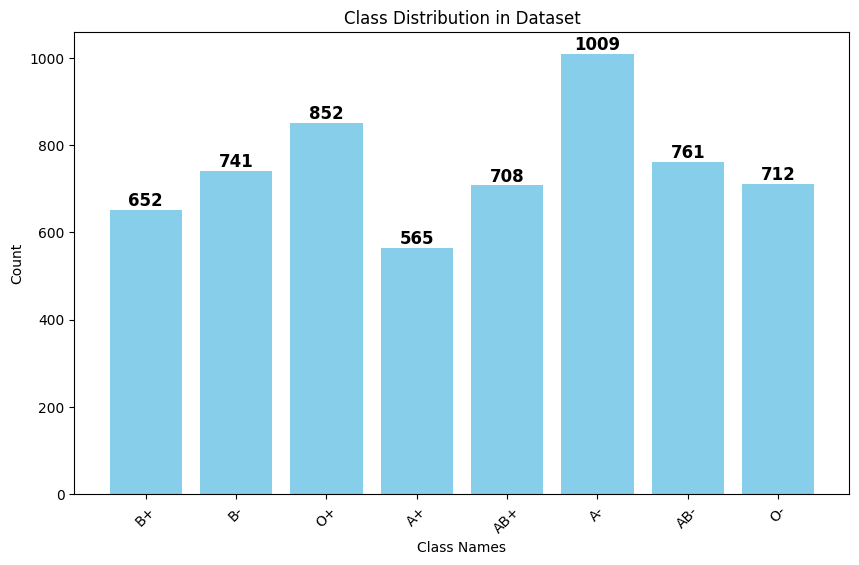

In [ ]:
plot_class_distribution(class_names, class_counts)

In [ ]:
#Function to oversample a class
def oversample_class(class_id, count, max_count):

    #Ensure the dataset is unbatched for filtering
    unbatched_dataset = dataset.unbatch()

    # Filter the dataset for the specific class
    class_dataset = unbatched_dataset.filter(lambda img, lbl: tf.equal(lbl, class_id))

    # Calculate the number of repetitions needed
    repeat_factor = max_count // count + (max_count% count > 0)

    #Repeat the dataset to match the desired count
    return class_dataset.repeat(repeat_factor).take(max_count)

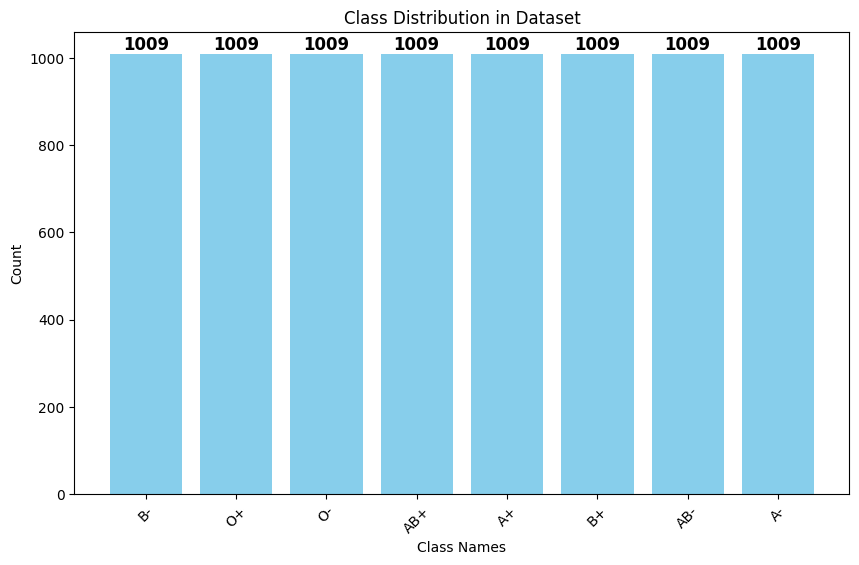

In [ ]:
#Step 1: Balance the dataset
max_count=max(class_counts.values())
balanced_datasets = []
for class_id, count in class_counts.items():
    balanced_datasets.append(oversample_class(class_id, count, max_count))

#Step 2: Combine balanced datasets
balanced_dataset = tf.data.Dataset.sample_from_datasets(balanced_datasets)

# Step 3: Check balanced class distribution
balanced_class_counts = Counter([int(lbl.numpy()) for _, lbl in balanced_dataset])
plot_class_distribution(class_names, balanced_class_counts)

# Step 4: Batch the balanced dataset
balanced_dataset = balanced_dataset.batch(BATCH_SIZE, drop_remainder=True)

In [ ]:
for sample in balanced_dataset.take(10):
    print(sample[0].shape)


(32, 128, 128, 3)
(32, 128, 128, 3)
(32, 128, 128, 3)
(32, 128, 128, 3)
(32, 128, 128, 3)
(32, 128, 128, 3)
(32, 128, 128, 3)
(32, 128, 128, 3)
(32, 128, 128, 3)
(32, 128, 128, 3)


In [ ]:
balanced_dataset_unbatched = balanced_dataset.unbatch()
dataset_size = sum(1 for _ in balanced_dataset_unbatched)
print(f"Total dataset size: {dataset_size}")


Total dataset size: 8064


In [ ]:
#Unbatch the dataset to work at the sample level
balanced_dataset_unbatched=balanced_dataset.unbatch()
train_ratio=0.7
val_ratio=0.2
# Compute sizes based on dataset size and desired splits
train_size = int(train_ratio*dataset_size)
val_size=int(val_ratio*dataset_size)

#Split the dataset into training, validation, and test
train_dataset=balanced_dataset_unbatched.take(train_size)
val_test_dataset=balanced_dataset_unbatched.skip(train_size)
val_dataset= val_test_dataset.take(val_size)
test_dataset = val_test_dataset.skip(val_size)

# Rebatch the datasets after splitting
train_dataset=train_dataset.batch(BATCH_SIZE, drop_remainder=True)
val_dataset=val_dataset.batch(BATCH_SIZE, drop_remainder=True)
test_dataset=test_dataset.batch(BATCH_SIZE, drop_remainder=True)

#Check the number of batches in each dataset
train_batch_count =sum(1 for _ in train_dataset)
val_batch_count = sum(1 for _ in val_dataset)
test_batch_count = sum(1 for _ in test_dataset)

print(f"Training dataset size: {train_batch_count*BATCH_SIZE}")
print(f"Validation dataset size: {val_batch_count*BATCH_SIZE}")
print(f"Testing dataset size: {test_batch_count*BATCH_SIZE}")

Training dataset size: 5632
Validation dataset size: 1600
Testing dataset size: 800


In [ ]:
import tensorflow as tf

def create_high_accuracy_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(128, 128, 3)),  # Explicitly define input shape
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.4),

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.4),

        tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.4),

        tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

high_acc_model = create_high_accuracy_model()


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Define ReduceLROnPlateau callback to reduce learning rate when validation loss plateaus
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',     # Monitor validation loss
    factor=0.5,             # Reduce the learning rate by a factor of 0.5
    patience=3,             # Wait for 3 epochs without improvement before reducing LR
    verbose=1,              # Print a message when the learning rate is reduced
    min_lr=1e-6             # Minimum learning rate to avoid too small values
)

# Define EarlyStopping callback to stop training when validation loss doesn't improve
early_stop = EarlyStopping(
    monitor='val_loss',               #Monitor validation loss
    patience=7,                       # Stop after 5 epochs without improvement
    verbose=1,                        # Print a message when training is stopped
    restore_best_weights=True         # Restore the model weights from the best epoch
)

In [ ]:
history_high_acc = high_acc_model.fit(
                   train_dataset,
                   validation_data=val_dataset,
                   epochs=100, # Adjust the number of epochs based on your preference
                   callbacks=[reduce_lr, early_stop]
                  )

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 41s 173ms/step - accuracy: 0.1221 - loss: 70.1923 - val_accuracy: 0.1388 - val_loss: 2.0786 - learning_rate: 0.0010
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 30s 169ms/step - accuracy: 0.1812 - loss: 2.0228 - val_accuracy: 0.5512 - val_loss: 1.4652 - learning_rate: 0.0010
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 41s 234ms/step - accuracy: 0.5439 - loss: 1.2608 - val_accuracy: 0.6269 - val_loss: 1.2392 - learning_rate: 0.0010
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 29s 166ms/step - accuracy: 0.6441 - loss: 0.9838 - val_accuracy: 0.5000 - val_loss: 1.2750 - learning_rate: 0.0010
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 30s 169ms/step - accuracy: 0.7058 - loss: 0.7834 - val_accuracy: 0.5869 - val_loss: 1.1135 - learning_rate: 0.0010
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 30s 170ms/step - accuracy: 0.7300 - loss: 0.7176 - val_accuracy: 0.5550 - val_loss: 1.2024 - learning_rate: 0.0010
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 30s 168ms/step - accur

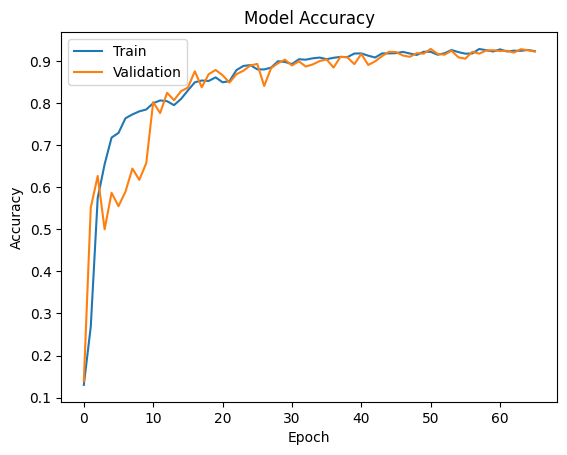

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
def plot_accuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Call the function to display the accuracy graph
plot_accuracy(history_high_acc)

In [ ]:
high_acc_model.save("model92.h5")

In [ ]:
# prompt: i want to test high_acc_model

loss, accuracy = high_acc_model.evaluate(test_dataset)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")


25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.9349 - loss: 0.2624
Loss: 0.261746346950531
Accuracy: 0.9387500286102295


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


In [ ]:
# prompt: i want to test it with nagi.jpg img

import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the saved model
model = tf.keras.models.load_model("model92.h5")

# Function to preprocess the image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image
    return img_array

# Preprocess the input image
img_path = "/content/dataset_blood_group/A+/cluster_0_1026.BMP"  # Replace with the actual path to your image
preprocessed_img = preprocess_image(img_path)


# Make prediction
prediction = model.predict(preprocessed_img)
print(prediction)
# Get the predicted class index
predicted_class_index = np.argmax(prediction)

# Assuming you have a list of class names
class_names = ['A+', 'A-', 'AB+', 'AB-', 'B+','B-','O+',"O-"] # Replace with your actual class names

# Print the predicted class
print(f"Predicted class: {class_names[predicted_class_index]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step
[[0.23121971 0.01047772 0.02190441 0.3747088  0.00587558 0.00599888
  0.06736036 0.28245458]]
Predicted class: B-


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

def preprocess_image(img_path, target_size=(128, 128)):
    """Preprocesses an image for model prediction."""
    img = image.load_img(img_path, target_size=target_size)  # Load image
    img_array = image.img_to_array(img)  # Convert to array
    # Normalize pixel values to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

In [ ]:
img_path = input()  # Replace with the actual image path
preprocessed_img = preprocess_image(img_path)
class_names = ['A+', 'A-', 'AB+', 'AB-', 'B+','B-','O+',"O-"]
# Make prediction
predictions = high_acc_model.predict(preprocessed_img)
predicted_class = np.argmax(predictions, axis=1)  # Get the class index
print(predictions)
print(f"Predicted class: {class_names[predicted_class[0]]}")

/content/nagi.jpg


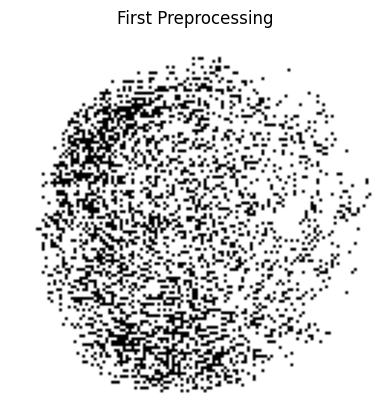

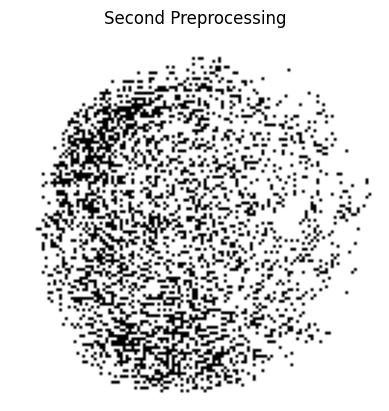

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Predictions from first preprocessing:
[[4.0226805e-06 9.6661352e-05 9.1672865e-07 9.3593097e-01 7.7583145e-06
  4.1204981e-05 2.7781576e-05 6.3890569e-02]]
Predicted class: AB-
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step

Predictions from second preprocessing:
[[4.0226805e-06 9.6661352e-05 9.1672865e-07 9.3593097e-01 7.7583145e-06
  4.1204981e-05 2.7781576e-05 6.3890569e-02]]
Predicted class: AB-


In [ ]:

# prompt: apply preproess 2 times of same image

import matplotlib.pyplot as plt
import numpy as np
# Assuming 'model' and 'preprocess_image' are defined as in the original code

# ... (Your existing code) ...

def preprocess_image(img_path, target_size=(128, 128)):
    """Preprocesses an image for model prediction twice and displays both."""
    img = image.load_img(img_path, target_size=target_size)  # Load image
    img_array = image.img_to_array(img)  # Convert to array

    # First preprocessing
    img_array1 = np.expand_dims(img_array, axis=0)
    # img_array1 /= 255.0

    # Display the first preprocessed image
    plt.imshow(img_array1[0])
    plt.axis('off')
    plt.title('First Preprocessing')
    plt.show()

    # Second preprocessing (example: applying a different transformation)
    img_array2 = np.expand_dims(img_array, axis=0)
    img_array2 = tf.image.random_flip_left_right(img_array2) # Example augmentation
    # img_array2 /= 255.0

    # Display the second preprocessed image
    plt.imshow(img_array2[0])
    plt.axis('off')
    plt.title('Second Preprocessing')
    plt.show()

    return img_array1, img_array2

img_path = input()  # Replace with the actual image path
preprocessed_img1, preprocessed_img2 = preprocess_image(img_path)


class_names = ['A+', 'A-', 'AB+', 'AB-', 'B+','B-','O+',"O-"]

# Make prediction using the first preprocessed image
predictions1 = high_acc_model.predict(preprocessed_img1)
predicted_class1 = np.argmax(predictions1, axis=1)  # Get the class index
print("Predictions from first preprocessing:")
print(predictions1)
print(f"Predicted class: {class_names[predicted_class1[0]]}")


# Make prediction using the second preprocessed image
predictions2 = high_acc_model.predict(preprocessed_img2)
predicted_class2 = np.argmax(predictions2, axis=1)  # Get the class index
print("\nPredictions from second preprocessing:")
print(predictions2)
print(f"Predicted class: {class_names[predicted_class2[0]]}")
